In [1]:
pip install pyspark==3.2

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 48.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=fec3014754470ad98e7f1815d0766d10b3a6e88177bd03f334cf094000cb90fc
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [1]:
import pyspark as ps

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
file="/content/gdrive/MyDrive/Colab Notebooks/finalprediction/finalprediction1.csv"
file1="/content/gdrive/MyDrive/Colab Notebooks/finalprediction/finalprediction2.csv"

In [4]:
#sc.stop()
conf = ps.SparkConf().setAll([('spark.executor.memory', '16g'), ('spark.driver.memory', '16g')])
sc = ps.SparkContext(conf=conf)

In [5]:
import functools
  
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

In [6]:
from pyspark.sql import SQLContext

sql_context = SQLContext(sc)
TwitterDataset = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file)
# TwitterDataset1 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file1)
# TwitterDataset2 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file2)
# TwitterDataset3 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file3)
# TwitterDataset4 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file4)
# TwitterDataset5 = sql_context.read.format('com.databricks.spark.csv').option('header','false').option("delimiter", ",").load(file5)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [7]:

# TwitterDataset = unionAll([TwitterDataset, TwitterDataset2])

In [8]:
# TwitterDataset = unionAll([TwitterDataset, TwitterDataset1])

In [9]:
# TwitterDataset = unionAll([TwitterDataset, TwitterDataset3])

In [10]:
# TwitterDataset = unionAll([TwitterDataset, TwitterDataset4])

In [11]:
# TwitterDataset = unionAll([TwitterDataset, TwitterDataset5])

In [12]:
print(TwitterDataset.count())

31037


In [13]:
TwitterDataset.show()

+--------------------+-------------+---+
|                 _c0|          _c1|_c2|
+--------------------+-------------+---+
|how does the djs ...|entertainment|4.0|
|imagine you ina s...|entertainment|4.0|
|after 5 weeks bas...|entertainment|0.0|
|alpha i would lov...|         tech|4.0|
|today s meditatio...|entertainment|4.0|
|03146 i clearly h...|    political|0.0|
|    morning sex any1|entertainment|4.0|
|good bye to good ...|entertainment|0.0|
|lmfao right like ...|    political|4.0|
|you guys are down...|entertainment|0.0|
|hurry up to get y...|         tech|4.0|
|some nightfood pa...|     business|4.0|
|1 clay did not ag...|    political|4.0|
|just as always ev...|entertainment|4.0|
|and we ll be tuni...|entertainment|4.0|
|life is a gift pr...|         tech|4.0|
|sell holo shaq en...|     business|0.0|
|12 some kids star...|         tech|4.0|
|gaethje quickly b...|         tech|4.0|
|hey au your inter...|     business|4.0|
+--------------------+-------------+---+
only showing top

In [14]:
query_1_source = TwitterDataset.groupBy("_c2").count()


In [15]:
query_1_source.show()

+---+-----+
|_c2|count|
+---+-----+
|0.0|11988|
|4.0|19049|
+---+-----+



In [16]:
TwitterDataset.createOrReplaceTempView("tweets")

In [17]:
TwitterDataset.head(5)

[Row(_c0='how does the djs know how to mix and play mohim dj', _c1='entertainment', _c2='4.0'),
 Row(_c0='imagine you ina shorty guts and you just see a tatt that read i hate men what y all doing lmaaaoooo', _c1='entertainment', _c2='4.0'),
 Row(_c0='after 5 weeks based in amed bali we are moving on to sanur in the busy south of the island today sad to leave th', _c1='entertainment', _c2='0.0'),
 Row(_c0='alpha i would love to make you look like a cheap whore and show you how a real man dominates you and dest', _c1='tech', _c2='4.0'),
 Row(_c0='today s meditation is about wired magazine obviously', _c1='entertainment', _c2='4.0')]

In [18]:
# query_1_source = sql_context.sql("SELECT cast(count(*) as int) as count , _c2 as categories FROM tweets WHERE _c2 ='political' or _c2='tech' or _c2='business' GROUP BY _c2 ORDER BY count desc")

In [19]:
query_1_source = sql_context.sql("SELECT cast(count(*) as int) as count , _c1 as categories FROM tweets WHERE _c1 ='political' or _c1='tech' or _c1='business' or _c1 = 'entertainment' or _c1 ='sport' GROUP BY _c1 ORDER BY count desc")

In [20]:
query_1_source = query_1_source.toPandas()


In [21]:
query_1_source.head()

,count,categories
0,8501,entertainment
1,7087,sport
2,6081,tech
3,4865,business
4,4503,political


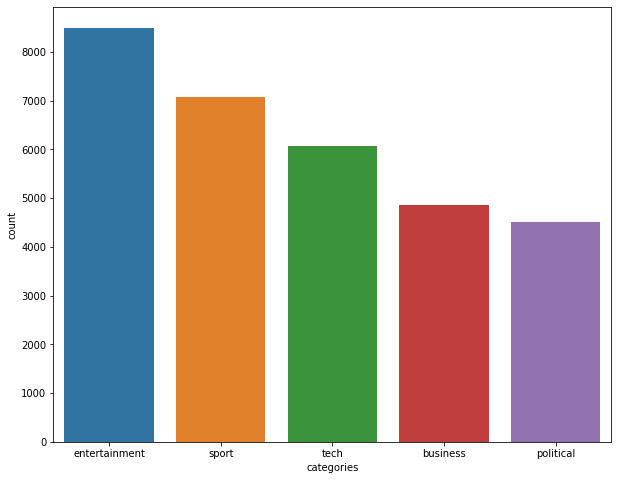

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
import seaborn as sns
import pandas
sns.barplot( x="categories", y="count", data=query_1_source)
plt.show()

In [23]:
from pyspark.sql.functions import col
#sentimentDataSet = TwitterDataset.select(col("_c1").alias("Sentiment"))
query_1_source = sql_context.sql("SELECT * FROM tweets WHERE  _c1 ='political' or _c1='tech' or _c1='business' or _c1 = 'entertainment' or _c1 ='sport'  ")

In [24]:
from pyspark.sql.functions import when
sentimentDataSet=query_1_source.withColumn("_c2", when(col("_c2") == 0, "Negitive").otherwise("Positive"))

Index(['_c0', '_c1', '_c2'], dtype='object')


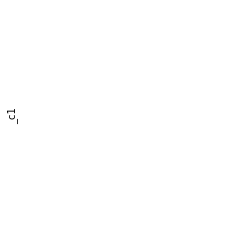

In [25]:
#airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

query_3_source = sentimentDataSet.toPandas()
print(query_3_source.columns)
query_3_source._c1.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["gray", "red"])

In [34]:
sentimentcategoryDataSet=sql_context.sql("SELECT * FROM tweets WHERE  _c1 ='political' or _c1='tech' or _c1='business' or _c1 = 'entertainment' or _c1 ='sport'  ")

In [35]:
sentimentcategoryDataSet

DataFrame[_c0: string, _c1: string, _c2: string]

In [36]:
sentimentcategoryDataSet = sentimentcategoryDataSet.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
sentimentcategoryDataSet=sentimentcategoryDataSet.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))

In [37]:
sentimentcategoryDataSet.show()

+---------+-------------+--------------------+
|Sentiment|          _c1|                 _c0|
+---------+-------------+--------------------+
| Positive|entertainment|how does the djs ...|
| Positive|entertainment|imagine you ina s...|
| Negitive|entertainment|after 5 weeks bas...|
| Positive|         tech|alpha i would lov...|
| Positive|entertainment|today s meditatio...|
| Negitive|    political|03146 i clearly h...|
| Positive|entertainment|    morning sex any1|
| Negitive|entertainment|good bye to good ...|
| Positive|    political|lmfao right like ...|
| Negitive|entertainment|you guys are down...|
| Positive|         tech|hurry up to get y...|
| Positive|     business|some nightfood pa...|
| Positive|    political|1 clay did not ag...|
| Positive|entertainment|just as always ev...|
| Positive|entertainment|and we ll be tuni...|
| Positive|         tech|life is a gift pr...|
| Negitive|     business|sell holo shaq en...|
| Positive|         tech|12 some kids star...|
| Positive|  

In [38]:
dataSet=sentimentcategoryDataSet.toPandas()

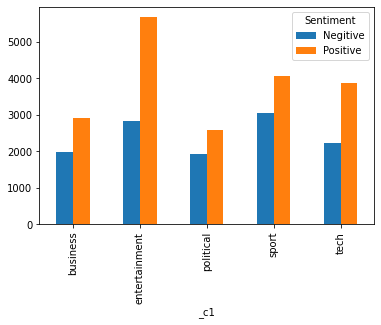

In [40]:

sentimentplot = dataSet.groupby(['_c1','Sentiment']).Sentiment.count().unstack()

sentimentplot.plot(kind='bar')

31037


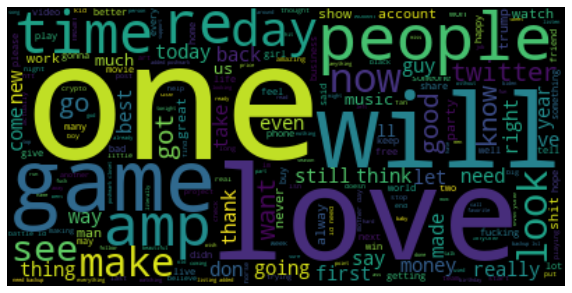

In [41]:
query_2_2_source=sentimentcategoryDataSet
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

6081


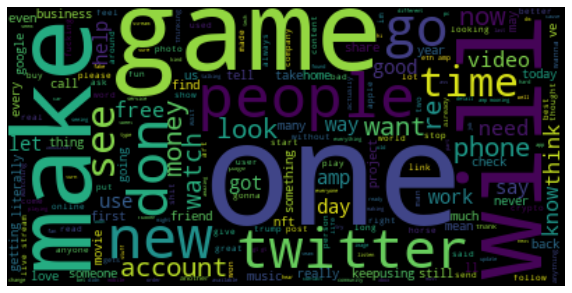

In [43]:
query_2_2_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c1"] == 'tech')
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags +str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

4503


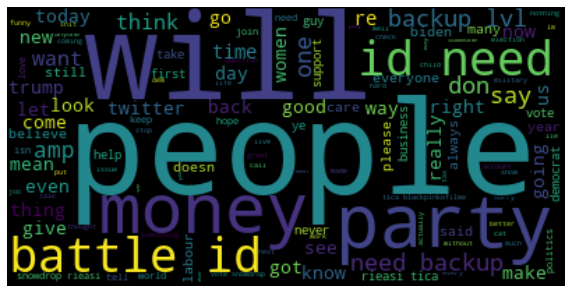

In [44]:
query_2_2_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c1"] == 'political')
print(query_2_2_source.count())
query_2_2_list = query_2_2_source.select('_c0').collect()
hashtags=" "   
for item in query_2_2_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

4865


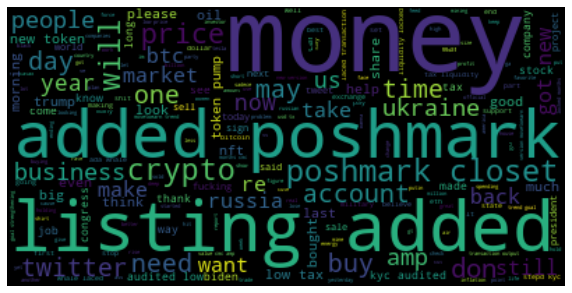

In [45]:
#bussiness
query_2_1_source=sentimentcategoryDataSet.filter(sentimentcategoryDataSet["_c1"] == 'business')
print(query_2_1_source.count())
query_2_1_list = query_2_1_source.select('_c0').collect()
hashtags=" "   
for item in query_2_1_list:
    hashtags = hashtags + str(item._c0).strip()
from wordcloud import WordCloud    
wordcloud = WordCloud().generate(hashtags)

plt.figure( figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
query_twitter_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%elonmusk%'   ")

In [49]:
query_twitter_Tech.show(5,truncate=False)

+---------------------------------------------------------------------------------------------------------+--------+---+
|_c0                                                                                                      |_c1     |_c2|
+---------------------------------------------------------------------------------------------------------+--------+---+
|have a look at the rules and don t miss eth elonmusk bitcoin binance btc                                 |sport   |0.0|
|chinese spacex elonmusk spacex                                                                           |business|4.0|
|elonmusk i am very disappointed to see this that you would take part in this only the far left compa     |sport   |0.0|
|vile digress elonmusk then yes yes theydulydeserve it theguy msnbc said secretly turn down the           |tech    |4.0|
|did you know doge works great as a payment system via r dogecoin by bitrequest elonmusk dogecoin dogearmy|tech    |4.0|
+-------------------------------

In [50]:
from pyspark.sql.functions import col
from pyspark.sql.functions import when
query_twitter_Tech = query_twitter_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))

In [51]:
query_twitter_Tech=query_twitter_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))

Index(['Sentiment', '_c1', '_c0'], dtype='object')


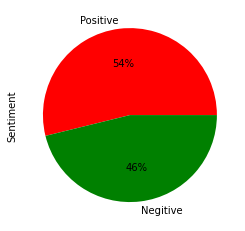

In [52]:
twittertech=query_twitter_Tech.count()
query = query_twitter_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=[ "red","green"])

In [53]:
twittertech=query_twitter_Tech.count()

Index(['Sentiment', '_c1', '_c0'], dtype='object')


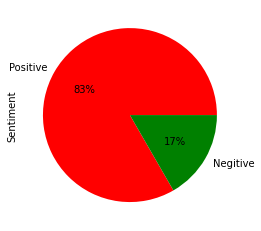

In [54]:

query_amp_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%cloud%' and _c1='tech' ")
query_amp_Tech = query_amp_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_amp_Tech=query_amp_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
querytech=query_amp_Tech.count()
query = query_amp_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


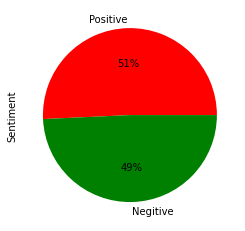

In [55]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%one%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
onetech=query_one_Tech.count()
query = query_one_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


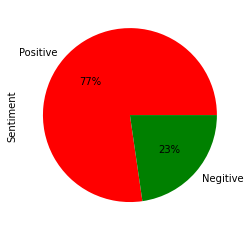

In [56]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%new%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
newtech=query_one_Tech.count()
query = query_one_Tech.toPandas()
print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

Index(['Sentiment', '_c1', '_c0'], dtype='object')


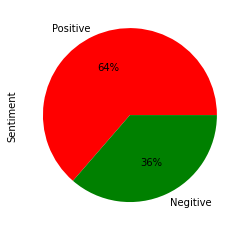

In [57]:
query_one_Tech = sql_context.sql("SELECT  *  FROM tweets WHERE _c0 Like '%make%' and _c1='tech' ")
query_one_Tech = query_one_Tech.select(col("_c2").alias("Sentiment"),col("_c1"),col("_c0"))
query_one_Tech=query_one_Tech.withColumn("Sentiment", when(col("Sentiment") == 0, "Negitive").otherwise("Positive"))
maketech=query_one_Tech.count()
query = query_one_Tech.toPandas()

print(query.columns)
query.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[ "red","green"])

In [58]:
print(twittertech)
print(maketech)
print(newtech)
print(onetech)
print(querytech)

13
187
229
751
6


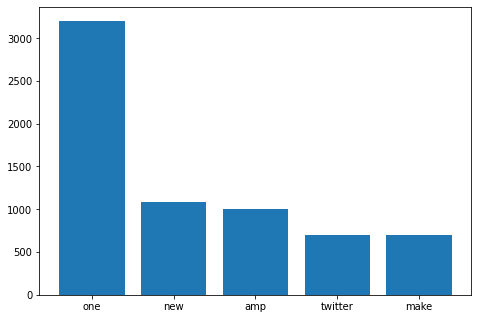

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ["one","new","amp","twitter","make"]
y = [3206,1086,1002,704,696];
ax.bar(x,y)
plt.show()